In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [19]:
messages = [line.strip() for line in open('smsspamcollection/SMSSpamCollection')]

In [21]:
#print (messages)

In [22]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [23]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [24]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [25]:
import pandas as pd

In [28]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                                        names=['label','message'])

In [29]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [32]:
messages['length'] = messages['message'].apply(len)

In [33]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

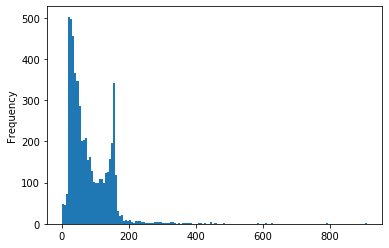

In [36]:
messages['length'].plot.hist(bins=150)

In [37]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [39]:
#messages[messages['length']==910]['message'].iloc[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000190CAA9D088>,
      dtype=object)

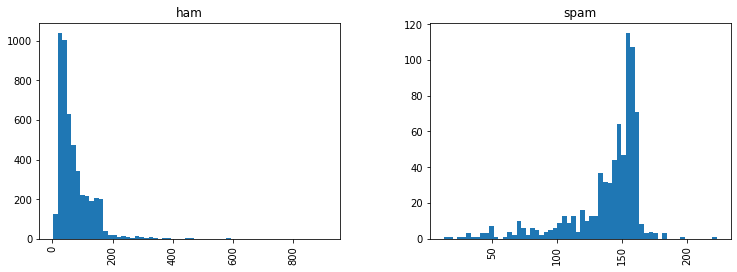

In [40]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [41]:
import string

In [42]:
mess = 'sample message! Notice: it has punctuation.'

In [43]:
nopunc = [c for c in mess if c not in string.punctuation]

In [45]:
from nltk.corpus import stopwords

In [48]:
nopunc = ''.join(nopunc)

In [50]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [51]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [62]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [67]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [68]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [71]:
print(len(bow_transformer.vocabulary_))

11425


In [72]:
mess4 = messages['message'][3]

In [73]:
print(mess4)

U dun say so early hor... U c already then say...


In [74]:
bow4 = bow_transformer.transform([mess4])

In [76]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [78]:
bow_transformer.get_feature_names()[9554]

'say'

In [79]:
messages_bow = bow_transformer.transform(messages['message'])

In [80]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [81]:
messages_bow.nnz

50548

In [82]:
sparsity = (100.0* messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [85]:
tfidf4 = tfidf_transformer.transform(bow4)

In [86]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [87]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [88]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [96]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [97]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [98]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],
                                                             messages['label'],test_size=0.3)

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [105]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000190CD64A708>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [106]:
predictions = pipeline.predict(msg_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1471
        spam       1.00      0.70      0.82       201

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.97      0.96      0.96      1672



[[1471    0]
 [  60  141]]
